# Júlia Vieira Barbosa, RA: 791713

## LAB3

## Exercício: Seleção de Variáveis com Pipeline e Forward Selection

Use o dataset diabetes do sklearn.datasets para avaliar como o desempenho de uma regressão linear varia com diferentes números de variáveis.

#### Passos:

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression

1. Carregue o dataset usando `load_diabetes()`.

In [ ]:
# Carregar o dataset
data = load_diabetes()

# Converter para DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

2. Divida os dados em treino (60%), validação (20%) e teste (20%) com `train_test_split()`.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) # Treino (60%) e o restante (40%)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Validação (20%) e teste (20%)


3. Para cada valor de k de 1 até o número total de variáveis:
  - Crie um `Pipeline` com dois passos:
    - `SequentialFeatureSelector` com:
      - `estimator=LinearRegression()`
      - `direction='forward'`
      - `cv=5`
      - `n_features_to_select=k`
    - `LinearRegression()`
  - Ajuste o pipeline na base de treino.
  - Calcule o MSE na base de validação.
  - Registre:
    - O valor de `k`
    - O MSE
    - As variáveis selecionadas

In [ ]:
resultados = []

for k in range(1, X.shape[1]):
  pipe = Pipeline([     # Pipeline
   ('selecao', SequentialFeatureSelector(estimator=LinearRegression(),n_features_to_select=k,
                                         direction='forward',cv=5)),
                                          ('regressor', LinearRegression())])
  pipe.fit(X_train, y_train) # Treino
  y_pred = pipe.predict(X_val) # PRedição na Validação
  mse = mean_squared_error(y_val, y_pred) # MSE

  variaveis_selecionadas = X.columns[pipe.named_steps['selecao'].get_support()].tolist() # Variaveis selecionadas pelo metodo

  resultados.append({'k': k,'MSE_val': mse,'variaveis': variaveis_selecionadas})


4. Organize os resultados em uma tabela.

In [ ]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,k,MSE_val,variaveis
0,1,3700.662228,[bmi]
1,2,2815.110442,"[bmi, s5]"
2,3,2718.053164,"[bmi, bp, s5]"
3,4,2550.963098,"[bmi, bp, s1, s5]"
4,5,2471.674048,"[sex, bmi, bp, s1, s5]"
5,6,2429.878416,"[sex, bmi, bp, s1, s2, s5]"
6,7,2428.908189,"[sex, bmi, bp, s1, s2, s3, s5]"
7,8,2409.617496,"[sex, bmi, bp, s1, s2, s3, s5, s6]"
8,9,2399.707027,"[sex, bmi, bp, s1, s2, s3, s4, s5, s6]"


5. Faça um gráfico do MSE em função do número de variáveis.

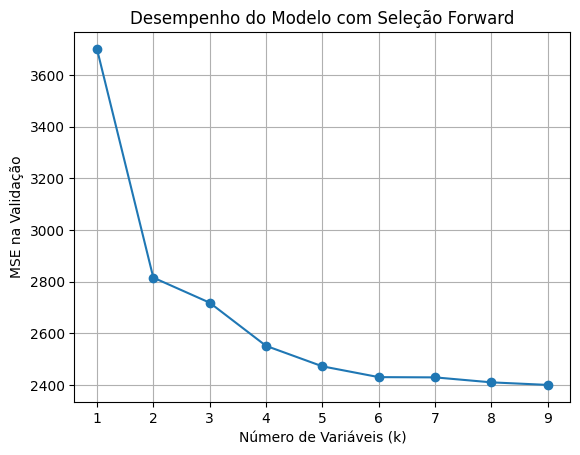

In [ ]:
plt.plot(df_resultados['k'], df_resultados['MSE_val'], marker='o')
plt.xlabel('Número de Variáveis (k)')
plt.ylabel('MSE na Validação')
plt.title('Desempenho do Modelo com Seleção Forward')
plt.grid(True)
plt.show()

Temos uma queda drástica do MSE entre 1 e 2 variáveis, indicando que as primeiras variáveis selecionadas explicam grande parte da variabilidade da resposta. A partir desse ponto, o MSE continua diminuindo, mas de forma mais lenta e estável, sugerindo ganhos marginais com a adição de mais variáveis. Dessa forma, é possível concluir que um modelo com 5 a 6 variáveis parece representar um bom equilíbrio entre simplicidade e desempenho, evitando overfitting com muitas variáveis.

## Exercício: Regularização com Ridge e Lasso
O objetivo deste exercício é analisar como a regularização afeta os coeficientes de uma regressão linear, utilizando os modelos Ridge e Lasso.

#### Objetivos
- Observar como os coeficientes variam conforme o parâmetro de regularização (alpha) aumenta.
- Comparar o efeito da regularização nos modelos Ridge e Lasso.

#### Passos:
1. Carregue o dataset `diabetes` com a função `load_diabetes()` da biblioteca `sklearn.datasets`.


In [ ]:
# Carregar o dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

2. Divida os dados em treino (60%), validação (20%) e teste (20%) usando `train_test_split` duas vezes.

In [ ]:
# 60% treino, 20% validação, 20% teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

3. Crie uma sequência de valores de `alpha` usando `np.logspace(-4, 2, 100)` (100 valores entre \(10^{-4}\) e \(10^2\)).

In [ ]:
# Valores de alpha entre 10^-4 e 10^2
alphas = np.logspace(-4, 2, 100)

4. Para cada valor de `alpha`, ajuste:
   - Um modelo `Ridge(alpha=...)`
   - Um modelo `Lasso(alpha=..., max_iter=10000)`
5. Guarde os coeficientes de cada modelo.

In [ ]:
coef_ridge = [] # Guardar coeficientes
coef_lasso = []

for a in alphas:
  ridge = Ridge(alpha=a) # Ridge
  ridge.fit(X_train, y_train)
  coef_ridge.append(ridge.coef_)

  lasso = Lasso(alpha=a, max_iter=10000) # Lasso
  lasso.fit(X_train, y_train)
  coef_lasso.append(lasso.coef_)

coef_ridge = pd.DataFrame(coef_ridge, columns=X.columns)
coef_lasso = pd.DataFrame(coef_lasso, columns=X.columns)


6. Faça dois gráficos:
   - Coeficientes do Ridge vs alpha (em escala logarítmica)

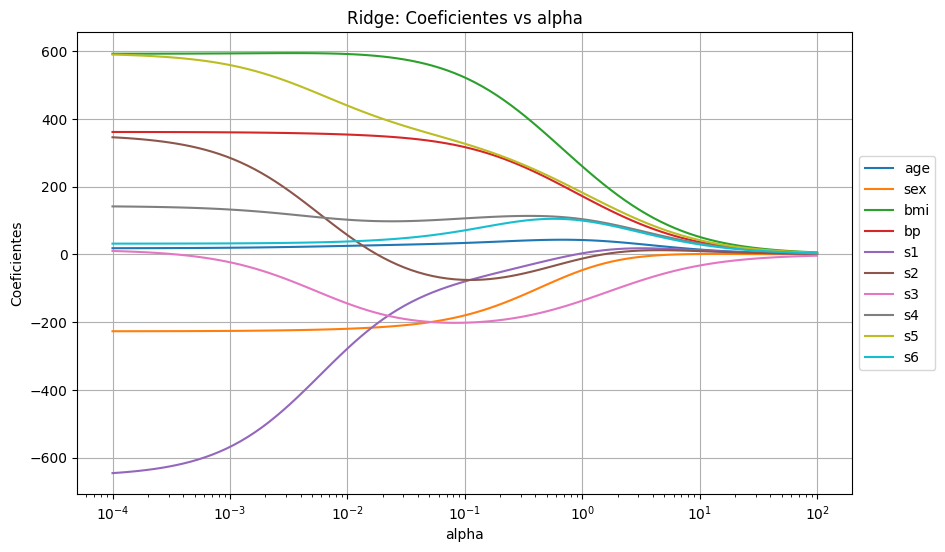

In [ ]:
# Ridge
plt.figure(figsize=(10, 6))
for col in coef_ridge.columns:
  plt.plot(alphas, coef_ridge[col], label=col)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coeficientes')
plt.title('Ridge: Coeficientes vs alpha')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

   - Coeficientes do Lasso vs alpha (em escala logarítmica)

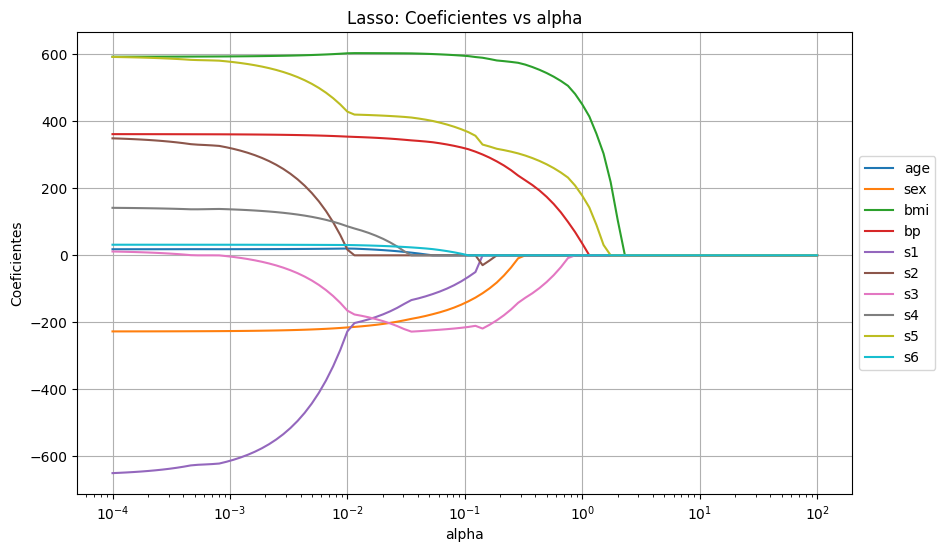

In [ ]:
# Lasso
plt.figure(figsize=(10, 6))
for col in coef_lasso.columns:
  plt.plot(alphas, coef_lasso[col], label=col)
  plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coeficientes')
plt.title('Lasso: Coeficientes vs alpha')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()


#### Pergunta
O que acontece com os coeficientes à medida que `alpha` aumenta? Compare Ridge e Lasso.

À medida que o parâmetro alpha aumenta, tanto o Ridge quanto o Lasso fazem os coeficientes das variáveis diminuírem, mas de formas diferentes. O Ridge faz os coeficientes diminuírem suavemente, sem zerar totalmente. Isso significa que o modelo continua usando todas as variáveis, mas com pesos menores, o que ajuda a evitar overfitting. Já o Lasso, além de diminuir os coeficientes, também zera alguns conforme o alpha cresce. Isso mostra que ele realiza seleção de variáveis, deixando apenas as mais importantes no modelo. Dessa forma, os dois métodos são eficientes em simplificar o modelo, mas o Lasso faz isso de forma mais agressiva, sendo útil quando queremos reduzir o número de variáveis.


## Exercício: Regularização com Ridge, Lasso e Regressão Linear em Alta Dimensionalidade

O objetivo deste exercício é comparar como os modelos Ridge, Lasso e Regressão Linear se comportam em um problema de alta dimensionalidade, onde poucas variáveis são realmente relevantes.

#### Objetivos:
- Observar como os coeficientes variam conforme o parâmetro de regularização (alpha) aumenta.
- Comparar o efeito da regularização nos modelos Ridge e Lasso.
- Analisar as diferenças entre regressão com e sem regularização.
- Avaliar o desempenho dos modelos no conjunto de teste.

#### Passos:
1. Carregue o arquivo `dataset.csv` com `pd.read_csv()`.
2. Separe as variáveis explicativas (`X1, X2, ..., X500`) da variável resposta (`y`).

In [ ]:
# Carregar o dataset
df = pd.read_csv("dataset.csv")

# Separar X e y
X = df.drop(columns='y')
y = df['y']

3. Divida os dados em treino (60%), validação (20%) e teste (20%).


In [ ]:
# Treino 60%, Validação 20%, Teste 20%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

4. Crie uma lista de valores de `alpha` com `np.linspace(0.01, 1000, 200)`.

In [ ]:
alphas = np.linspace(0.01, 1000, 200) # 200 valores entre 0.01 e 1000

5. Para cada valor de `alpha`, ajuste dois modelos usando a base de treino:
   - `Ridge(alpha=...)`
   - `Lasso(alpha=..., max_iter=10000)`
6. Para cada modelo e alpha, calcule o MSE na base de validação.

In [ ]:
mse_ridge = []
mse_lasso = []
modelos_ridge = []
modelos_lasso = []

for a in alphas:
  ridge = Ridge(alpha=a) # Ridge
  ridge.fit(X_train, y_train)
  pred_ridge = ridge.predict(X_val)
  mse_ridge.append(mean_squared_error(y_val, pred_ridge))
  modelos_ridge.append(ridge)

  lasso = Lasso(alpha=a, max_iter=10000) # Lasso
  lasso.fit(X_train, y_train)
  pred_lasso = lasso.predict(X_val)
  mse_lasso.append(mean_squared_error(y_val, pred_lasso))
  modelos_lasso.append(lasso)

7. Encontre o melhor alpha (menor MSE na validação).
8. Avalie o MSE no conjunto de teste com o melhor alpha de cada modelo.
9. Treine também uma `LinearRegression()` (sem regularização) e calcule o MSE no teste.

In [ ]:
idx_ridge = np.argmin(mse_ridge) # Menor erro
idx_lasso = np.argmin(mse_lasso) # Menor erro

melhor_ridge = modelos_ridge[idx_ridge]
melhor_lasso = modelos_lasso[idx_lasso]

melhor_ridge

Lasso(alpha=np.float64(5.035075376884422), max_iter=10000)

In [ ]:
melhor_lasso

Lasso(alpha=np.float64(5.035075376884422), max_iter=10000)

In [ ]:
linear = LinearRegression() # Ajustando linear
linear.fit(X_train, y_train)

# MSEs no teste (para os três modelos)
mse_ridge_teste = mean_squared_error(y_test, melhor_ridge.predict(X_test))
mse_lasso_teste = mean_squared_error(y_test, melhor_lasso.predict(X_test))
mse_linear_teste = mean_squared_error(y_test, linear.predict(X_test))

print("MSE - Ridge:", mse_ridge_teste)
print("MSE - Lasso:", mse_lasso_teste)
print("MSE - Linear:", mse_linear_teste)

MSE - Ridge: 3733.1393771081507
MSE - Lasso: 231.37797368658542
MSE - Linear: 3733.375564959812



10. Extraia os coeficientes dos três modelos (`.coef_`) e plote um gráfico de barras com os 10 maiores em módulo.

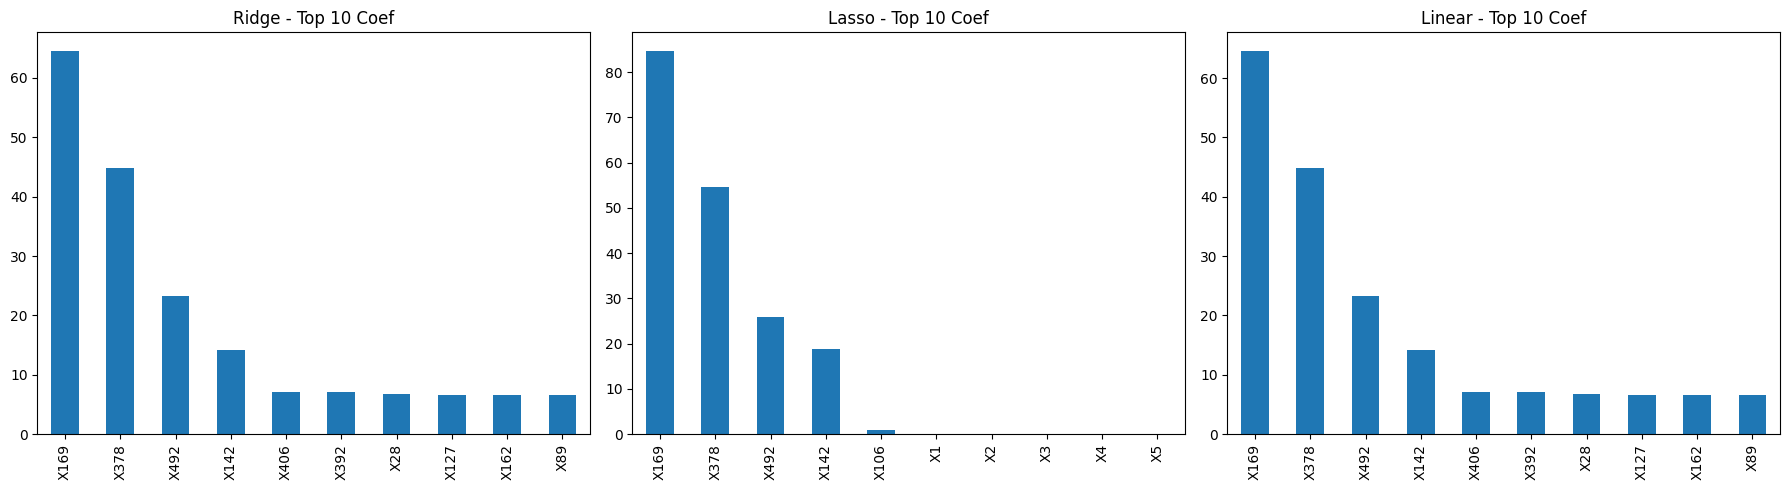

In [ ]:
# Coeficientes
coef_ridge = np.abs(melhor_ridge.coef_)
coef_lasso = np.abs(melhor_lasso.coef_)
coef_linear = np.abs(linear.coef_)

ridge_top = pd.Series(coef_ridge, index=X.columns).nlargest(10)
lasso_top = pd.Series(coef_lasso, index=X.columns).nlargest(10)
linear_top = pd.Series(coef_linear, index=X.columns).nlargest(10)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

ridge_top.plot(kind='bar', ax=axs[0], title='Ridge - Top 10 Coef')
lasso_top.plot(kind='bar', ax=axs[1], title='Lasso - Top 10 Coef')
linear_top.plot(kind='bar', ax=axs[2], title='Linear - Top 10 Coef')

plt.tight_layout()
plt.show()


## Perguntas:
- O que acontece com os coeficientes quando alpha aumenta?

Na regressão linear comum, os coeficientes podem ficar bem grandes, porque o modelo tenta se ajustar o máximo possível aos dados, mesmo que isso cause overfitting. Já nos outros modelos, quando o alpha aumenta, os modelos começam a controlar os coeficientes. No Ridge, eles ficam menores, mas não somem. No Lasso, muitos coeficientes viram exatamente zero, ele praticamente escolhe só as variáveis mais importantes e ignora o resto.

- Qual modelo realiza seleção de variáveis?

O Lasso faz seleção de variáveis, porque ele zera vários coeficientes. O Ridge só diminui os valores dos coeficientes, mas continua usando todas as variáveis. E a regressão linear nem diminui os coeficientes.

- Como os coeficientes da regressão linear se comparam aos regularizados?

Como já dito, na regressão linear os coeficientes podem ficar grandes e usar todas as variáveis, até mesmo as que não ajudam muito. Nos modelos regularizados, os coeficientes ficam mais controlados.

- Qual modelo teve melhor desempenho no teste? Isso faz sentido no cenário de alta dimensionalidade?

O modelo que teve disparado o melhor desempenho foi o Lasso, com um MSE bem menor do que os outros. Isso tem sentido com o fato de estarmos lidando com alta dimensionalidade (muitas variáveis), e o Lasso ajuda a eliminar variáveis irrelevantes, deixando o modelo mais simples e focado só nas que realmente importa. Assim, ele possui desempenho muito melhor no teste.

In [ ]:
!jupyter nbconvert --execute --to html "/content/Julia_Vieira_Barbosa_LAB3_MineracaoDeDados_20251.ipynb"

[NbConvertApp] Converting notebook /content/Julia_Vieira_Barbosa_LAB3_MineracaoDeDados_20251.ipynb to html
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 636810 bytes to /content/Julia_Vieira_Barbosa_LAB3_MineracaoDeDados_20251.html
